# An introdiction to machine learning using Python

The idea behind machine learning and workflow concepts

Mention we will do supervised learning, unsupervised possible (no labels). Reinforcement is like unsupervised, in that it had no separately supplied target data/labels, but responds to reward from an external environment rather than just structuring data.

Use sklearn throughout and more traditional, non-deep methods.

In [256]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

The relation to dimensional reduction and clustering.

- three example class, overlapping

In [210]:
# Normally distributed random numbers : needs mean, STD and array size
group1 = np.random.normal([-0.2, 0.0], 0.3, (50,2)) 
group2 = np.random.normal([0.8, 0.8], 0.2, (100,2))
group3 = np.random.normal([0.0, 1.0], 0.5, (200,2))

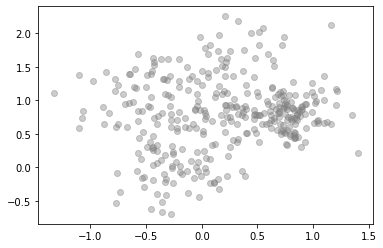

In [211]:
group_data = np.concatenate([group1, group2, group3])
group_x = group_data[:,0]
group_y = group_data[:,1]

true_classes = np.zeros(350)
true_classes[50:150] = 1
true_classes[150:] = 2
 
plt.scatter(group_x, group_y, color='#808080', alpha=0.4)

Plot original group identities

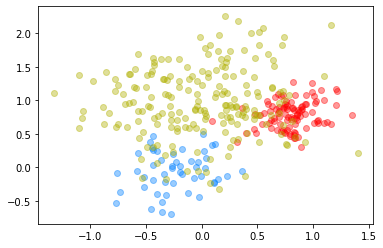

In [212]:
plt.scatter(group1[:,0], group1[:,1], color='#0080FF', alpha=0.4)
plt.scatter(group2[:,0], group2[:,1], color='#FF0000', alpha=0.4)
plt.scatter(group3[:,0], group3[:,1], color='#B0B000', alpha=0.4)

Show k-means clustering

In [244]:
model1 = sklearn.cluster.KMeans(3, random_state=7)
model1.fit(group_data)
classes1 = model1.labels_
print(classes[:10])

[1 1 0 0 1 2 2 1 2 2]


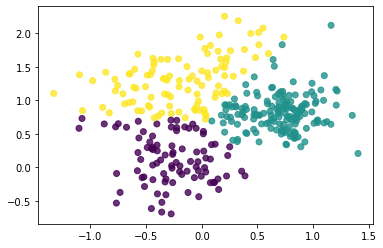

In [245]:
plt.scatter(group_x, group_y, c=classes1, alpha=0.8)

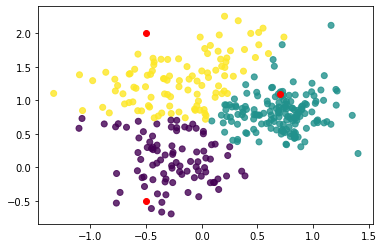

In [246]:
pred_points = np.array([[-0.5, 2.0], [0.7, 1.1], [-0.5, -0.5]])
plt.scatter(group_x, group_y, c=classes1, alpha=0.8)
plt.scatter(pred_points[:,0], pred_points[:,1], color='r')

In [247]:
print(model1.predict(pred_points))

[2 1 0]


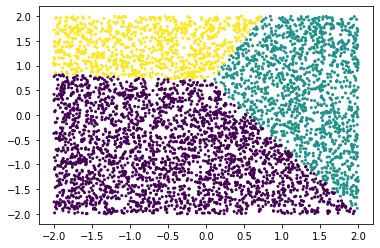

In [248]:
sample_data = np.random.uniform(-2.0, 2.0, (5000, 2))
sample_classes = model1.predict(sample_data)
plt.scatter(sample_data[:,0], sample_data[:,1], c=sample_classes, s=4)

Show kNN - include decision boundaries

In [249]:
model2 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
model2.fit(group_data, true_classes)
classes2 = model1.labels_

Text(0.5, 1.0, 'True Class')

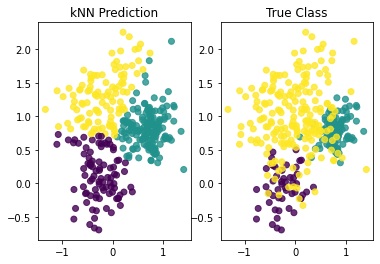

In [250]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(group_x, group_y, c=classes2, alpha=0.8)
ax1.set_title('kNN Prediction')
ax2.scatter(group_x, group_y, c=true_classes, alpha=0.8)
ax2.set_title('True Class')

Show SVM do this - include decision bounaries

In [251]:
model3 = sklearn.svm.LinearSVC()
model3.fit(group_data, true_classes)
classes3 = model1.labels_

Text(0.5, 1.0, 'True Class')

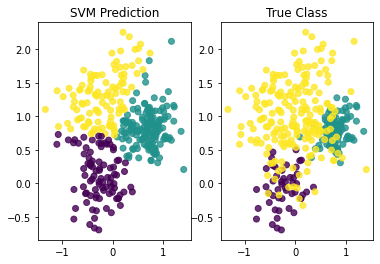

In [252]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(group_x, group_y, c=classes3, alpha=0.8)
ax1.set_title('SVM Prediction')
ax2.scatter(group_x, group_y, c=true_classes, alpha=0.8)
ax2.set_title('True Class')

Text(0.5, 1.0, 'Support Vector')

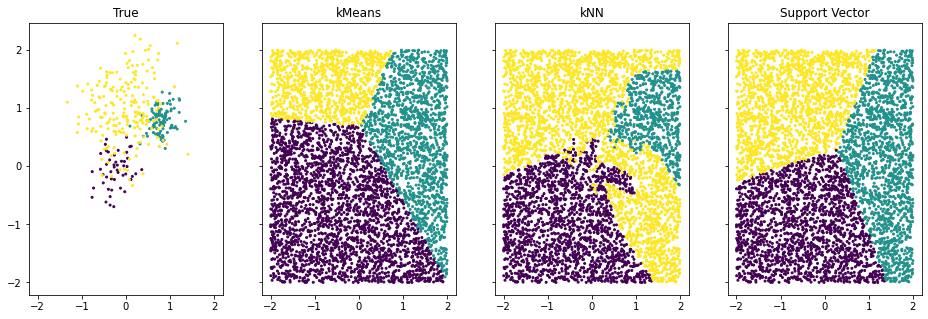

In [253]:
sample_data = np.random.uniform(-2.0, 2.0, (5000, 2))
sample_x, sample_y =sample_data.T

fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, sharex=True, sharey=True)
fig.set_size_inches(16,5)

ax0.scatter(group_x, group_y, c=true_classes, s=4)
ax0.set_title('True')

ax1.scatter(sample_x, sample_y, c=model1.predict(sample_data), s=4)
ax1.set_title('kMeans')

ax2.scatter(sample_x, sample_y, c=model2.predict(sample_data), s=4)
ax2.set_title('kNN')

ax3.scatter(sample_x, sample_y, c=model3.predict(sample_data), s=4)
ax3.set_title('Support Vector')

Discuss extrapolation

High-dimensionality data; everything as a vector

- proteomics data?
- mnist

In [286]:
digits = sklearn.datasets.load_digits()
digit_data = digits.data
digit_labels = digits.target
print(digit_data.shape, digit_labels.shape)

(1797, 64) (1797,)


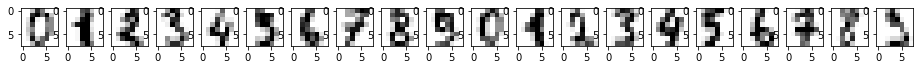

In [339]:
fig, axs = plt.subplots(1, 20)
fig.set_size_inches(16,8)
for i in range(20):
    axs[i].imshow(digit_data[i].reshape(8,8), cmap='Greys')

(10000, 784)


In [340]:
pca_model = sklearn.decomposition.PCA(2, whiten=True)
pca_model.fit(digit_data)

,n_components,2
,copy,True
,whiten,True
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [341]:
pca_proj = pca_model.transform(digit_data)
print(pca_proj.shape)

(1797, 2)


In [342]:
from umap import UMAP
umap_model = UMAP(n_components=2)
umap_model.fit(digit_data)
umap_proj = umap_model.transform(digit_data)
print(umap_proj.shape)

(1797, 2)


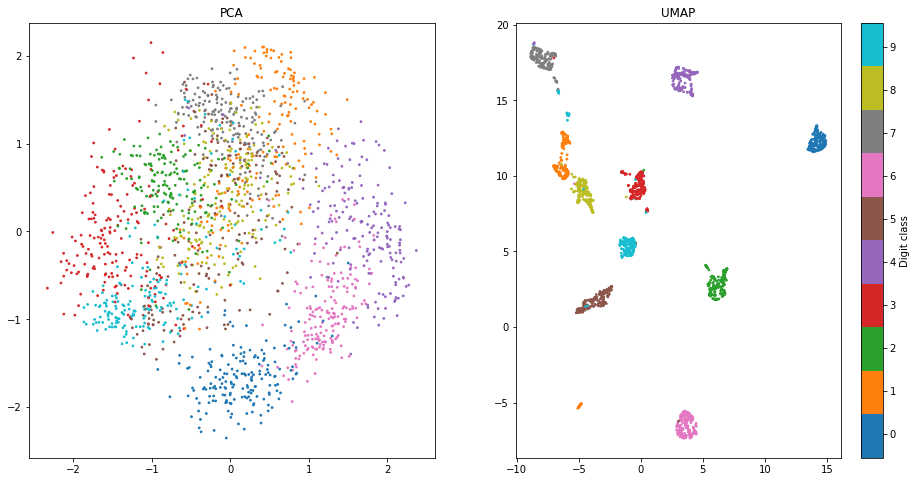

In [357]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)

ax1.scatter(pca_proj[:,0], pca_proj[:,1], s=3, c=digit_labels, cmap='tab10')
ax1.set_title('PCA')

sc = ax2.scatter(umap_proj[:,0], umap_proj[:,1], s=3, c=digit_labels, cmap='tab10')
ax2.set_title('UMAP')
cb2 = fig.colorbar(sc, ax=ax2)
cb2.ax.set_yticks(np.linspace(0.5, 8.5, 10))
cb2.ax.set_yticklabels(range(10))
cb2.set_label('Digit class')

- samples vs features
- one-hot
 
Project to 2D with PCA, tSNE

Show kNN/SVM on the projection

Show SVM on the original

Show a simple least squares regression

Show SVM regression

Overall workflow

Data preprocessing, normalisation

  - demo standard scaler : before and after 2D
  - missing values

Test train split

  - mention scaling leak
  - test vs validation set

Assessment metrics
  
  - regression metrics
  - confusion matrix 
  - precision, accuracy, recall, F1
  - ROC

Class imbalance

  - under and over sampling
  - mention class weights

Ensemble training

  - cross-validation

Homogenous vs hetrogenous data

  - Variable correlations
  - FactorAnalysis vs PCA
  - GLS


Model choice

  - tuning hyperparameters
  - auto sklearn
  